# 1 Import Dependencies and Data

In [2]:
!pip install tensorflow tensorflow-gpu==2.8.0 matplotlib tensorflow-datasets ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 73.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 64.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e3/ba/aa8a76eff5c20761b0361a5b4c9fccb8742c29a82adba7a8ad8ae819984e/tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes~=0.2.0 from https://files.pythonhosted.org/packages/d1/1d/d5cf76e5e40f69dbd273036e3172ae4a614577cb141673427b80cac948df/ml_dtypes-0.2.0

In [3]:
!pip list

Package                                  Version               Editable project location
---------------------------------------- --------------------- -------------------------
absl-py                                  1.4.0
accelerate                               0.25.0
access                                   1.1.9
affine                                   2.4.0
aiobotocore                              2.8.0
aiohttp                                  3.8.5
aiohttp-cors                             0.7.0
aioitertools                             0.11.0
aiorwlock                                1.3.0
aiosignal                                1.3.1
albumentations                           1.3.1
alembic                                  1.13.0
altair                                   5.2.0
annotated-types                          0.6.0
annoy                                    1.17.3
ansiwrap                                 0.8.4
anyio                                    3.7.1
apache-beam        

Limit the memory growth

In [4]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
# Bringing in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [7]:
# Use the tensoflow datastets api to bring in the data source
ds = tfds.load('fashion_mnist', split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete0XUAYV/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incomplete0XUAYV/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
# display the image arrays
ds.as_numpy_iterator().next()['image']

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 69],
      

# 2. Visualize Data and Build Dataset

In [9]:
# import numpy to do some data transformation
# we will use it to squeeze the image
import numpy as np

In [10]:
# Setup connection (iterator)
data_iterator = ds.as_numpy_iterator()

In [11]:
# Gettig data out of the pipeline
data_iterator.next()['label']

2

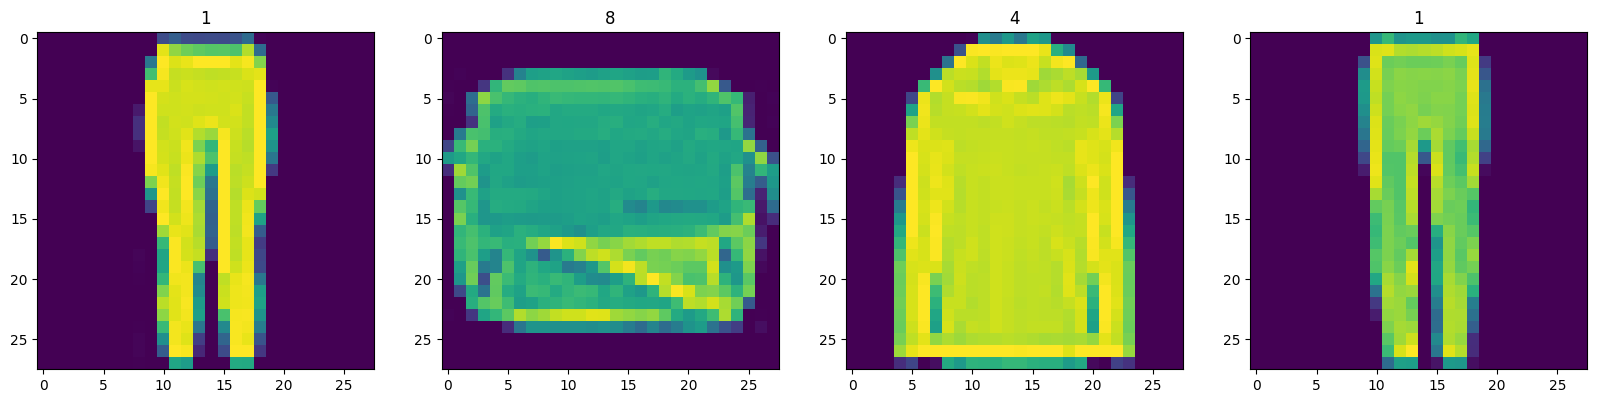

In [12]:
# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Loop four times and get images
for idx in range(4):
    # Grab an image and label
    sample = data_iterator.next()
    # plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image'])) ## squeeze help give 2x2 format for the image to be ploted
    # appending the image label as a title
    ax[idx].title.set_text(sample['label'])

At this stage, we need to do some data processing. So right now,we have images that are representd to values between 0 and 255, in order to build a good machine learning model we want to scal those images between 0 and 1.

In [13]:
# A function to scal our images
def scale_images(data):
    image = data['image']
    return image / 255

In [14]:
# Reloaded the dataset (optional)
ds = tfds.load('fashion_mnist', split='train')

# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)

# Cache the dataset fro that batch
ds = ds.cache()

# Shuffle dataset
ds = ds.shuffle(60000)

# Batch into 128 images sample
ds = ds.batch(128)

# Reduces the likelihood of bottleneching
ds = ds.prefetch(64)

In [15]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# 3. Build the Neural Network

### 3.1 Import Modeling Components

In [16]:
# Bring in the sequential api for generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D 

### 3.2 Build Generator

In [17]:
def build_generator():
    model = Sequential()
    
    # Takes in a random value and shape it by 7x7x128 
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convelutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convelutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layout to het to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

In [18]:
generator = build_generator()

In [19]:
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [20]:
img = generator.predict(np.random.rand(4,128,1))
img

array([[[[0.50143373],
         [0.5025412 ],
         [0.50245357],
         ...,
         [0.5029898 ],
         [0.50055754],
         [0.5005106 ]],

        [[0.502413  ],
         [0.50192046],
         [0.5036284 ],
         ...,
         [0.506482  ],
         [0.5036264 ],
         [0.5013798 ]],

        [[0.5087689 ],
         [0.509882  ],
         [0.50642216],
         ...,
         [0.50371313],
         [0.5041993 ],
         [0.5028979 ]],

        ...,

        [[0.50339097],
         [0.50611234],
         [0.503596  ],
         ...,
         [0.5032729 ],
         [0.50079876],
         [0.5003312 ]],

        [[0.50309676],
         [0.50405514],
         [0.50362074],
         ...,
         [0.5027535 ],
         [0.5011877 ],
         [0.4988487 ]],

        [[0.5013058 ],
         [0.5018787 ],
         [0.50303805],
         ...,
         [0.50097436],
         [0.5009727 ],
         [0.5004688 ]]],


       [[[0.5013729 ],
         [0.5031203 ],
         [0.50

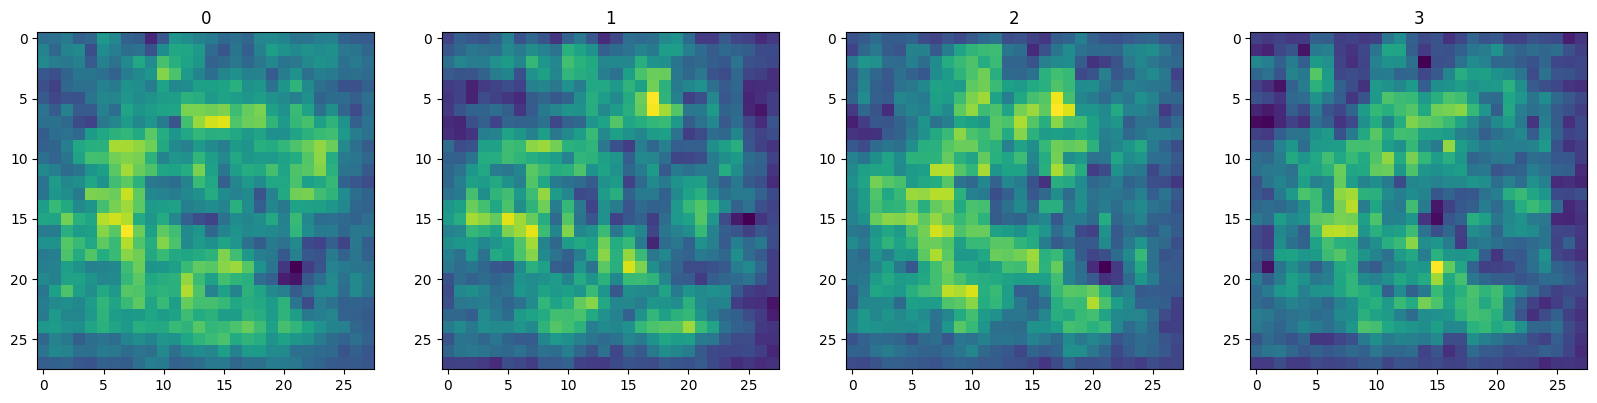

In [21]:
# Generat new fashion
img = generator.predict(np.random.rand(4,128,1))

# Setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

# Loop four times and get images
for idx, img in enumerate(img):
    # plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img)) ## squeeze help give 2x2 format for the image to be ploted
    # appending the image label as a title
    ax[idx].title.set_text(idx)

### 3.3 Build Discriminator

In [22]:
def build_discriminator():
    model = Sequential()
    
    # First conv Block
    model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth conv Block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [23]:
discriminator = build_discriminator()

In [24]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [25]:
img.shape

(28, 28, 1)

In [26]:
discriminator.predict(np.expand_dims(img,0))

array([[0.49805596]], dtype=float32)

# 4. Construct Training Loop

### 4.1 Setup Losses and Optimizers

In [27]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam

# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [28]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [29]:
# Importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [30]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [31]:
# Create an instance of the subclassed model
fashgan = FashionGAN(generator, discriminator)

In [32]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### 4.3 Build Callback

In [33]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [34]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

### 4.3 Train

In [ ]:
# Recommand 2000 epochs
hist = fashgan.fit(ds, epochs=20)

Epoch 1/20
469/469 [==============================] - 42s 82ms/step - d_loss: 0.5570 - g_loss: 0.7785
Epoch 2/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.3809 - g_loss: 3.6236
Epoch 3/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.2854 - g_loss: 3.6168
Epoch 4/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.6472 - g_loss: 0.9252
Epoch 5/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.6910 - g_loss: 0.6107
Epoch 6/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.6672 - g_loss: 0.5734
Epoch 7/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.6665 - g_loss: 0.4436
Epoch 8/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.6920 - g_loss: 0.5260
Epoch 9/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.6929 - g_loss: 0.5948
Epoch 10/20
469/469 [==============================] - 38s 82ms/step - d_loss: 0.6

### 4.4 Review performance

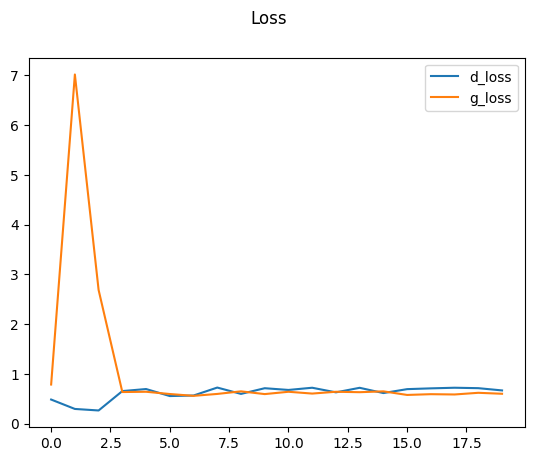

In [36]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Test Out the Generator

### 5.1 Generator images

In [47]:
generator.load_weights(os.path.join('/kaggle/input/generatormodel-h5', 'generatormodel.h5'))

ValueError: axes don't match array

In [37]:
imgs = generator.predict(tf.random.normal((16,128,1)))

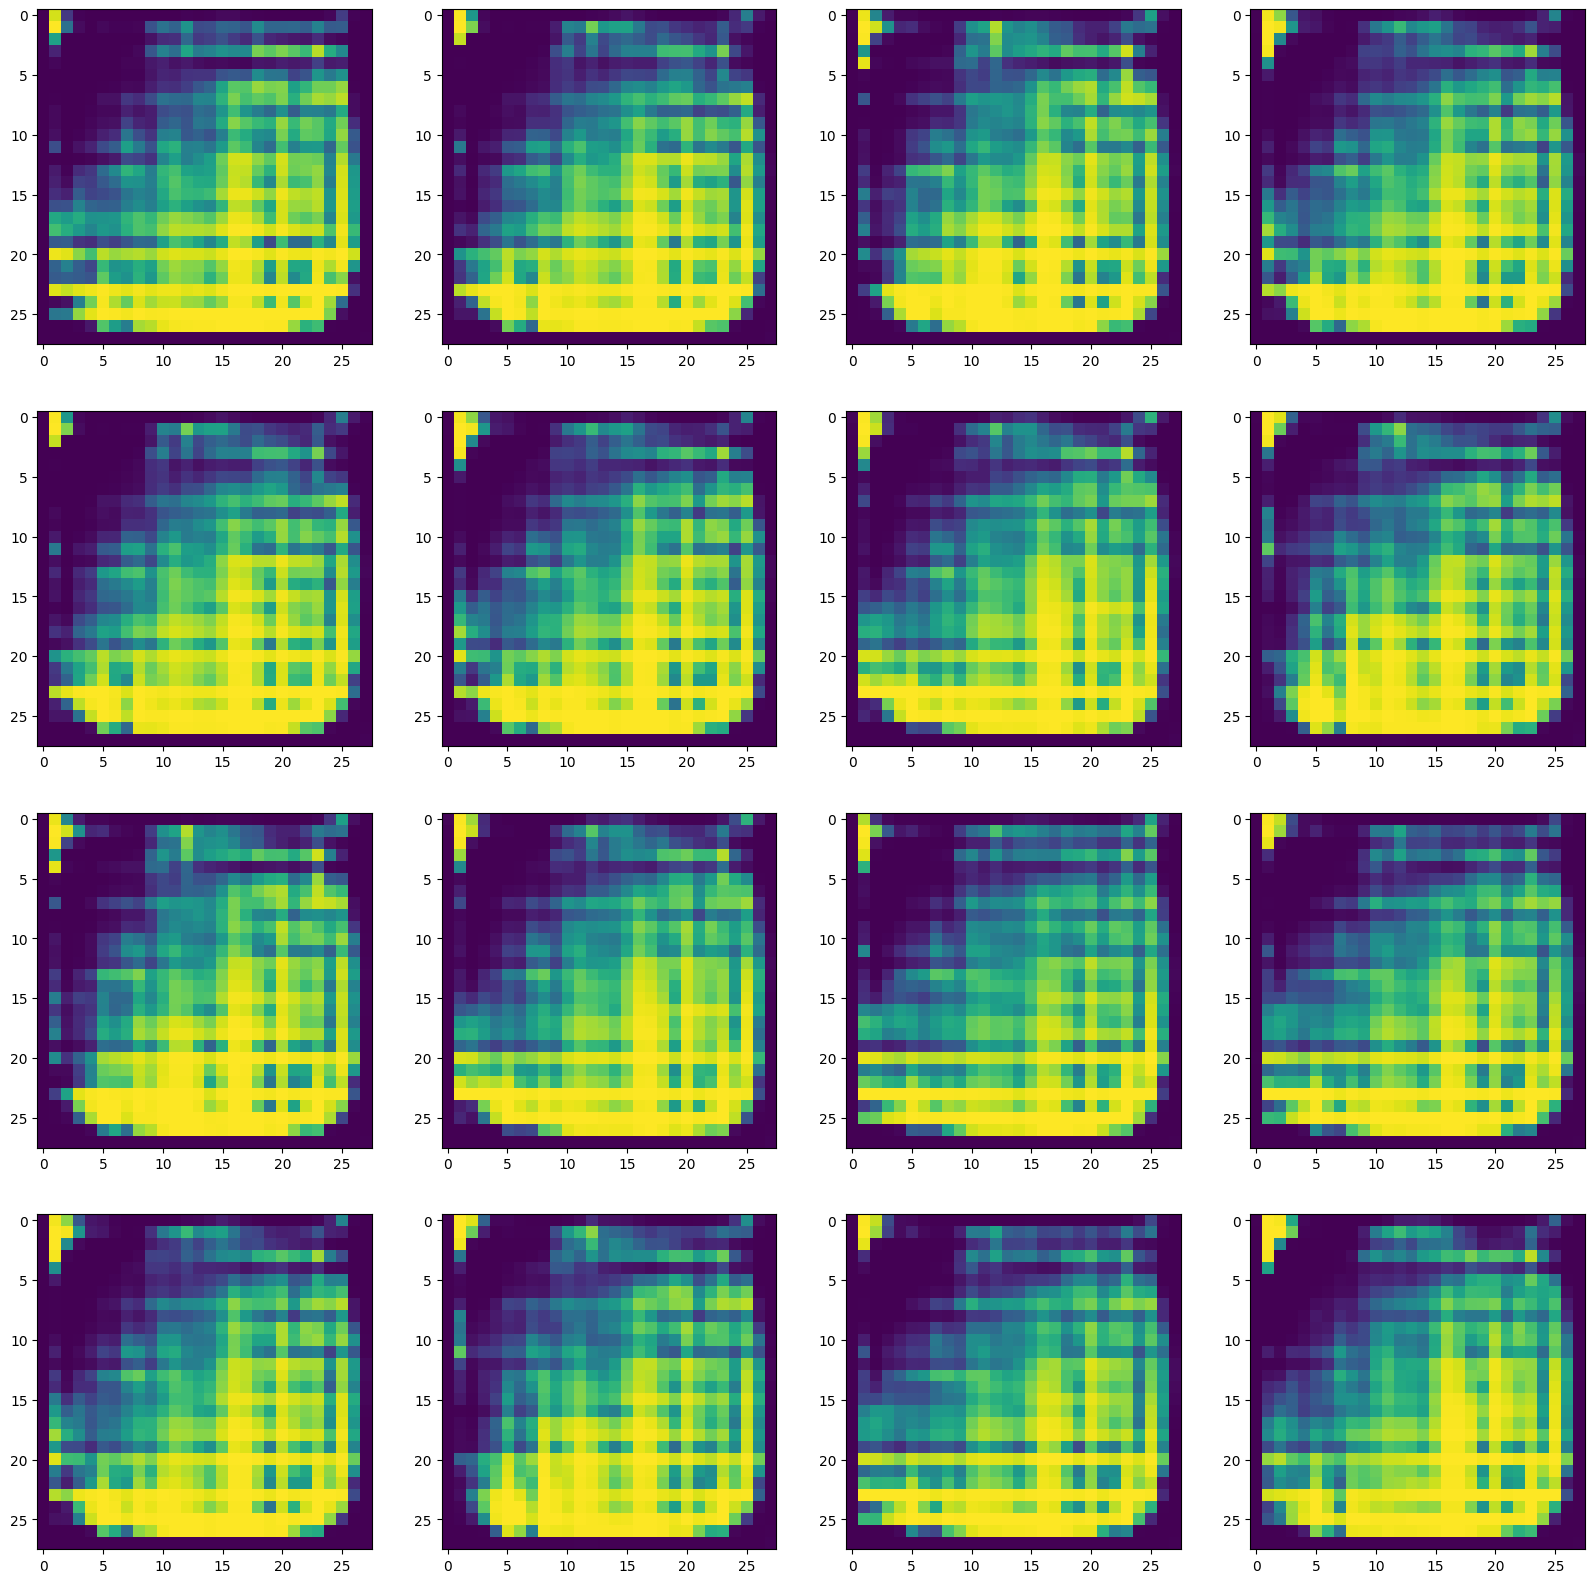

In [40]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

### 5.2 Save the model

In [48]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')